# COVID-19 Data in LA Neighborhoods

## Introduction

For this assignment I want to look at data that shows me how differently COVID-19 has impacted various LA neighborhoods. I searched for data in the LA geohub portal and was able to find this data set that has data for a number of neighborhoods in the city of LA. This data includes information about cases, case rates, deaths, and death rates among other columns of data. I am particulary interested in looking how the number of deaths vary throughout the city of LA.

## Data Exploration

**Step 1:** I begin by importing the geopandas module into my notebook so that I have the ability to create a map later if I need to.

In [2]:
import geopandas as gpd

**Step 2:** Now, I can import my data into my notebook.

In [3]:
covid19 = gpd.read_file('data/COVID19_by_Neighborhood.geojson')

**Step 3:** I have imported my data and I now want to see how many rows and columns I have. I will run the *.shape* command to get this information.

In [3]:
covid19.shape

(141, 14)

**Step 4:** I now want to see more information about my data frame, so I will now input the command *.info( )*. This will provide me with information about the columns, how many non-null components I have, and what is the dtype for each column in my data set.

In [4]:
covid19.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   FID            141 non-null    int64   
 1   COMTY_NAME     141 non-null    object  
 2   CERT           141 non-null    object  
 3   Shape_Leng     141 non-null    float64 
 4   Shape_Area     141 non-null    float64 
 5   location       141 non-null    object  
 6   cases          141 non-null    int64   
 7   case_rate      141 non-null    int64   
 8   deaths         141 non-null    int64   
 9   death_rate     141 non-null    int64   
 10  Date           141 non-null    object  
 11  Shape__Area    141 non-null    float64 
 12  Shape__Length  141 non-null    float64 
 13  geometry       141 non-null    geometry
dtypes: float64(4), geometry(1), int64(5), object(4)
memory usage: 15.5+ KB


**Step 5:** I can begin to generate some samples. I will generate the first 5 rows of data by using the *.head( )* command.

In [5]:
covid19.head()

,FID,COMTY_NAME,CERT,Shape_Leng,Shape_Area,location,cases,case_rate,deaths,death_rate,Date,Shape__Area,Shape__Length,geometry
0,1,SYLMAR,yes,111633.753407,3.404014e+08,SYLMAR,14535,17640,184,223,2021-01-30,4.647324e+07,41236.137343,"POLYGON ((-118.50655 34.33524, -118.50576 34.3..."
1,2,GRANADA HILLS,yes,89564.685903,4.264128e+08,GRANADA HILLS,5745,9873,137,235,2021-01-30,5.818514e+07,33094.502125,"POLYGON ((-118.54219 34.29860, -118.54084 34.2..."
2,3,PORTER RANCH,yes,73616.951350,2.267371e+08,PORTER RANCH,2140,6013,23,65,2021-01-30,3.093173e+07,27183.552463,"POLYGON ((-118.59618 34.27462, -118.59377 34.2..."
3,4,LAKEVIEW TERRACE,yes,75477.956189,1.448471e+08,LAKEVIEW TERRACE,2116,16112,30,228,2021-01-30,1.975813e+07,27863.458449,"POLYGON ((-118.40834 34.28671, -118.40755 34.2..."
4,5,MISSION HILLS,yes,50728.509850,1.061586e+08,MISSION HILLS,3848,15951,96,398,2021-01-30,1.447757e+07,18746.395093,"POLYGON ((-118.47067 34.29432, -118.46554 34.2..."


**Step 6:** I can also generate the last 5 rows of data by running the *.tail()* command.

In [6]:
covid19.tail()

,FID,COMTY_NAME,CERT,Shape_Leng,Shape_Area,location,cases,case_rate,deaths,death_rate,Date,Shape__Area,Shape__Length,geometry
136,137,RESEDA RANCH,yes,18708.731569,1.451375e+07,RESEDA RANCH,577,12446,2,43,2021-01-30,1.976856e+06,6902.338968,"POLYGON ((-118.56227 34.21558, -118.56225 34.2..."
137,138,HARBOR PINES,yes,10876.810441,6.269908e+06,HARBOR PINES,146,6061,0,0,2021-01-30,8.452589e+05,3991.750245,"POLYGON ((-118.30778 33.77926, -118.30787 33.7..."
138,139,SYCAMORE SQUARE,yes,6644.151958,2.623158e+06,SYCAMORE SQUARE,26,4019,2,309,2021-01-30,3.559718e+05,2447.865365,"POLYGON ((-118.34584 34.05721, -118.34589 34.0..."
139,140,BROOKSIDE,yes,10335.543446,5.858064e+06,BROOKSIDE,30,5164,2,344,2021-01-30,7.949481e+05,3805.238012,"POLYGON ((-118.34062 34.05713, -118.33874 34.0..."
140,141,VIEW HEIGHTS,Yes,9976.486406,6.366350e+06,VIEW HEIGHTS,205,5550,4,108,2021-01-30,8.624123e+05,3672.727579,"POLYGON ((-118.35001 33.98167, -118.35001 33.9..."


**Step 7:** I can also plot the current data to visualize the extent of what parts of LA are covered in this data. I do this by running the *.plot( )* command. When I run it, I can see that mostly the entire city of LA is included in this data.

<AxesSubplot:>

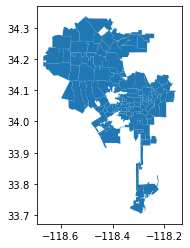

In [7]:
covid19.plot()

**Step 8:** Now I can begin digging into the data and bringing to focus what I am mostly interested in. For the purpose of this assignment, I will be looking closely at number of deaths per location. I begin by running the *.columns.to_list( )* command so that I can see what the columns are named and search for the columns I want to focus on.

In [9]:
covid19.columns.to_list()

['FID',
 'COMTY_NAME',
 'CERT',
 'Shape_Leng',
 'Shape_Area',
 'location',
 'cases',
 'case_rate',
 'deaths',
 'death_rate',
 'Date',
 'Shape__Area',
 'Shape__Length',
 'geometry']

- I have picked out the columns 'location' and 'deaths' so I will individually generate these columns in the cells below.

In [77]:
covid19['location']

0                SYLMAR
1         GRANADA HILLS
2          PORTER RANCH
3      LAKEVIEW TERRACE
4         MISSION HILLS
             ...       
136        RESEDA RANCH
137        HARBOR PINES
138     SYCAMORE SQUARE
139           BROOKSIDE
140        VIEW HEIGHTS
Name: location, Length: 141, dtype: object

In [78]:
covid19['deaths']

0      184
1      137
2       23
3       30
4       96
      ... 
136      2
137      0
138      2
139      2
140      4
Name: deaths, Length: 141, dtype: int64

- I also want to see how many times each location appears in the data so I will also run the *.value_counts()* command.

In [80]:
covid19['location'].value_counts()

HYDE PARK             2
TEMPLE-BEAUDRY        2
CLOVERDALE/COCHRAN    1
FAIRCREST HEIGHTS     1
REYNIER VILLAGE       1
                     ..
BEL AIR               1
BRENTWOOD             1
PACIFIC PALISADES     1
BEVERLY CREST         1
VIEW HEIGHTS          1
Name: location, Length: 139, dtype: int64

- For the most part each neighborhood only appears once with the exception of Hyde Park and Temple-Beaudry.

## Trimming the Data

**Step 9:** Now that I have explored my data and seen the value counts for the data I am interested in I will create a graph to begin to visualize this data. For this example, I will use the total number of deaths in each neighborhood. First, I will trim my data frame using by creating the 'desired_columns varaible' so that it displays locations, deaths, and geometry. 

In [4]:
desired_columns = ['location','deaths','geometry']
covid19[desired_columns]

,location,deaths,geometry
0,SYLMAR,184,"POLYGON ((-118.50655 34.33524, -118.50576 34.3..."
1,GRANADA HILLS,137,"POLYGON ((-118.54219 34.29860, -118.54084 34.2..."
2,PORTER RANCH,23,"POLYGON ((-118.59618 34.27462, -118.59377 34.2..."
3,LAKEVIEW TERRACE,30,"POLYGON ((-118.40834 34.28671, -118.40755 34.2..."
4,MISSION HILLS,96,"POLYGON ((-118.47067 34.29432, -118.46554 34.2..."
...,...,...,...
136,RESEDA RANCH,2,"POLYGON ((-118.56227 34.21558, -118.56225 34.2..."
137,HARBOR PINES,0,"POLYGON ((-118.30778 33.77926, -118.30787 33.7..."
138,SYCAMORE SQUARE,2,"POLYGON ((-118.34584 34.05721, -118.34589 34.0..."
139,BROOKSIDE,2,"POLYGON ((-118.34062 34.05713, -118.33874 34.0..."


**Step 10:** I then save my new data frame under the new variable 'covid19_trimmed' by creating a copy of the desired columns I generated in the step before.

In [5]:
covid19_trimmed = covid19[desired_columns].copy()
covid19_trimmed

,location,deaths,geometry
0,SYLMAR,184,"POLYGON ((-118.50655 34.33524, -118.50576 34.3..."
1,GRANADA HILLS,137,"POLYGON ((-118.54219 34.29860, -118.54084 34.2..."
2,PORTER RANCH,23,"POLYGON ((-118.59618 34.27462, -118.59377 34.2..."
3,LAKEVIEW TERRACE,30,"POLYGON ((-118.40834 34.28671, -118.40755 34.2..."
4,MISSION HILLS,96,"POLYGON ((-118.47067 34.29432, -118.46554 34.2..."
...,...,...,...
136,RESEDA RANCH,2,"POLYGON ((-118.56227 34.21558, -118.56225 34.2..."
137,HARBOR PINES,0,"POLYGON ((-118.30778 33.77926, -118.30787 33.7..."
138,SYCAMORE SQUARE,2,"POLYGON ((-118.34584 34.05721, -118.34589 34.0..."
139,BROOKSIDE,2,"POLYGON ((-118.34062 34.05713, -118.33874 34.0..."


**Step 11:** I am now able to create a graph that will show me how many deaths there were per location based on the data set. 

<AxesSubplot:title={'center':'Number of Deaths per Location'}, xlabel='location'>

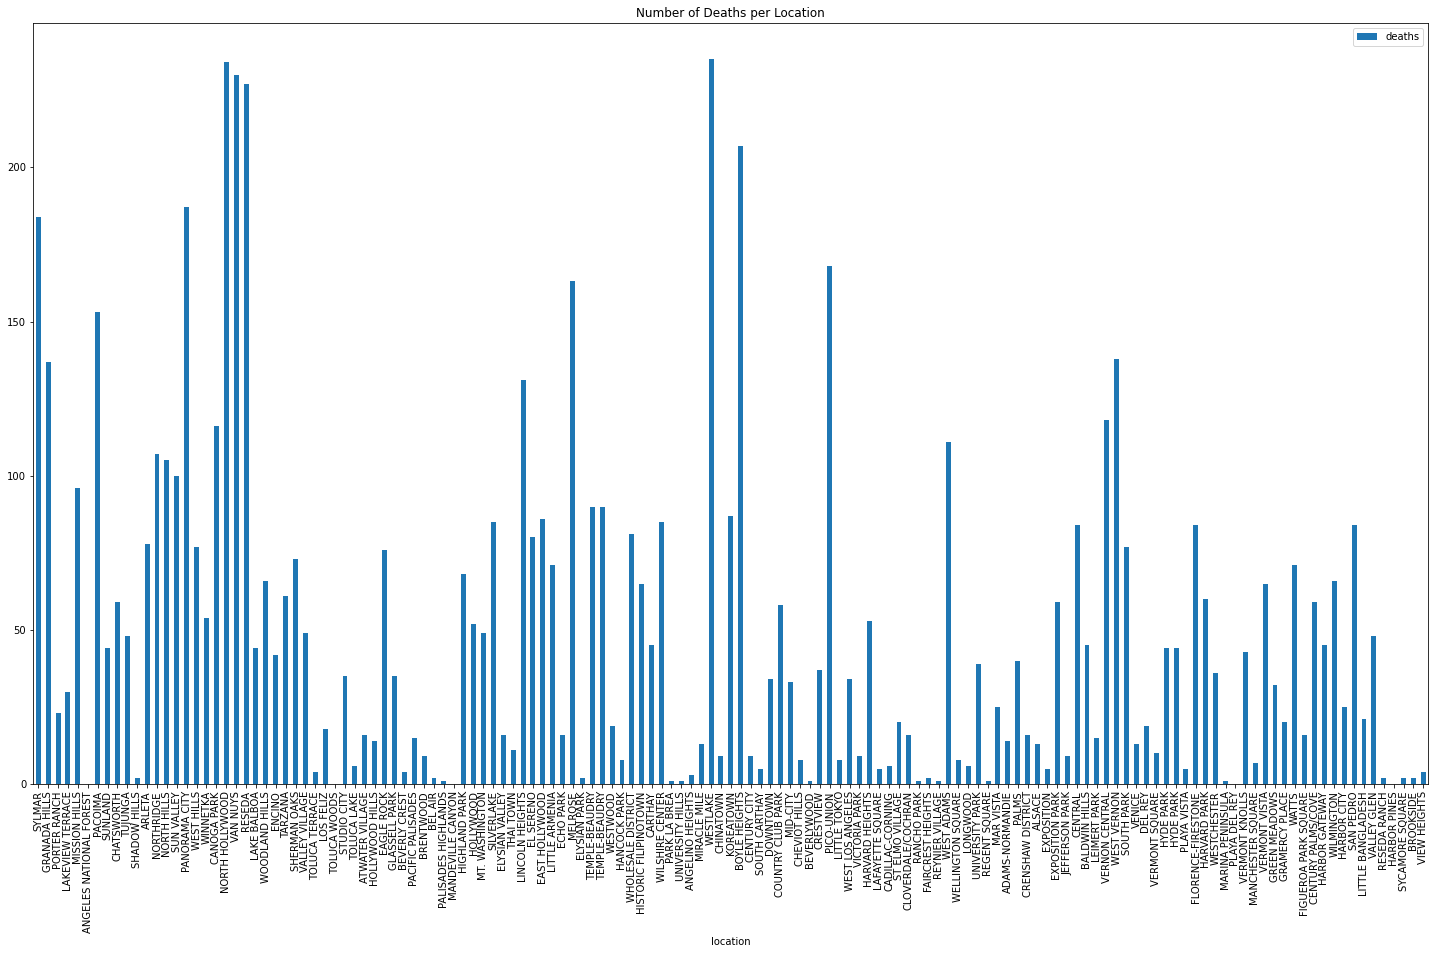

In [6]:
covid19_trimmed.plot.bar(
    figsize=(25,14), x = 'location', y = 'deaths', title = 'Number of Deaths per Location')

## Filtering the Trimmed Data through Query

**Step 12:** Now that I have a subset of the data that I am mostly interested in, I can filter the data even more to begin to focus on specific neighborhoods. I will filter the based on location and I will do this two times: once for Canoga Park and once for Los Feliz. This will allow me to compare the number of deaths between the two locations.

In [7]:
covid19_trimmed[covid19_trimmed.location == 'CANOGA PARK']

,location,deaths,geometry
18,CANOGA PARK,116,"POLYGON ((-118.58860 34.23548, -118.58837 34.2..."


- I can see that there has been 116 covid related deaths in Canoga Park.

In [8]:
covid19_trimmed[covid19_trimmed.location == 'LOS FELIZ']

,location,deaths,geometry
29,LOS FELIZ,18,"POLYGON ((-118.32892 34.15031, -118.32575 34.1..."


- In contrast, the Los Feliz neighborhood has only experienced 18 covid-19 related deaths.

## Findings

Based on the data exploration and query that I have conducted with this data set, I can now see that several neighborhoods experienced more COVID-19 related deaths than others. In some cases the differences are extremely high. For example, Canoga Park had significantly more deaths than Los Feliz. There can be a number of factors that influence these numbers, but I simply wanted to see these differences and how big these differences were when comapring certain neighborhoods.